# 0. Введение.

Привет! Эта лабораторная работа про то, какие есть способы сбора данных с сайтов. Давай начнём с небольшого введения про то, как её выполнять.

В коде и тексте этой лабораторной работы встречаются блоки двух видов. Первый из них будет в ячейках с кодом и выглядит он так:


```
# TODO
```

Это означает, что тут надо написать одну или несколько строчек кода.

Второй тип блоков выглядит так - <font color='violet'> \# TODO </font>. Он означает, что тут надо написать какие-то свои мысли и выводы. Когда будешь писать, пожалуйста, не меняй цвет текста твоего ответа - это упростит проверку.

В тексте внизу собраны все нужные библиотечки - запускаем её и начинаем выполнение лабораторной работы! :)

In [99]:
from urllib.request import urlopen
from urllib.parse import urlparse, urldefrag, urljoin
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import json

# Часть 1. Работа со статическими страницами при помощи bs4. 3 балла.



В этой части вам не нужно работать с маркетплейсами или сложными крупными онлайн-магазинами, достаточно поиграться с **небольшим нишевым магазинчиком**.

Пример сайта, подходящего под задание:
- Семена овощей - Аэлита https://ailita-shop.ru/


Вам нужно найти ПОХОЖИЙ сайт без динамической подгрузки контента (таких в интернете очень много)

Для формирования представления о магазине достаточно посмотреть на товары одной выбранной категории.

На странице товара **должна содержалась следующая информация, которую вам надо будет получить в рамках задания**:

- Название
- Картинка
- Характеристики (минимум 1)
- Описание

Описание должно быть достаточно большим (больше одного предложения) и содержать информацию о характеристиках товара. Например, как это бывает на алиэкспрессе

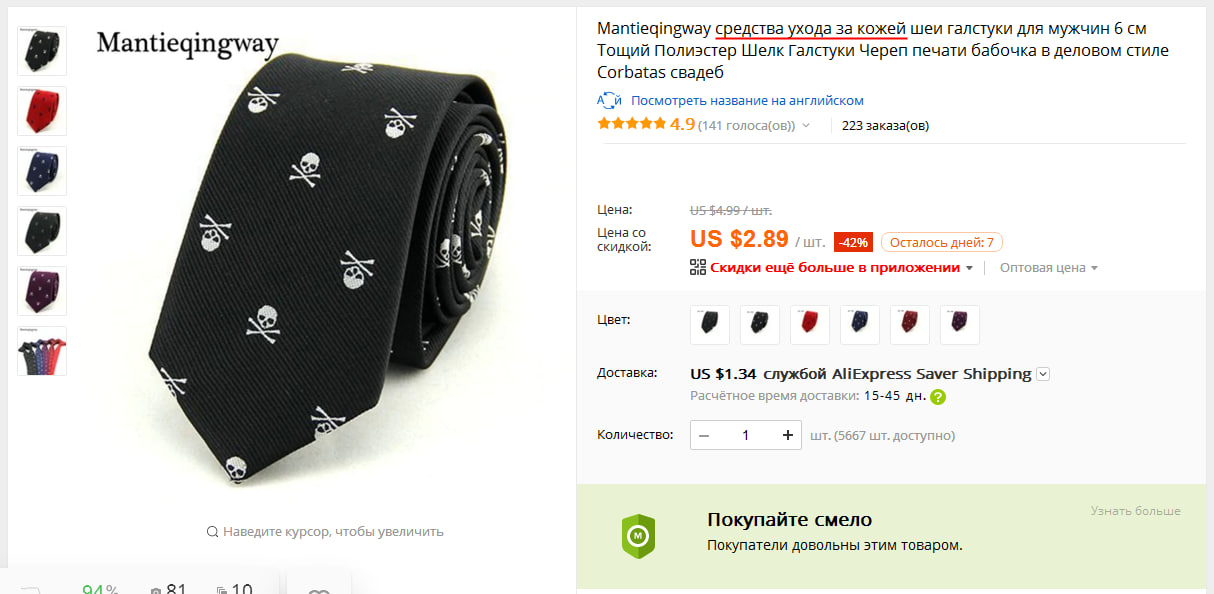

## Исследование

Выберите магазин, который удовлетворяет описанию магазина-конкурента:

<font color='violet'> https://semena.ru/catalog/semena/yagody/ </font>

Выберите категорию товаров и посмотрите на предлагаемые карточки товаров. **Категория должна содержать 20+ карточек, чтобы можно было составить более полное мнение о товарах в магазине.**

In [100]:
url = "https://semena.ru/catalog/semena/yagody/"

Откройте ссылку с помощью библиотеки `urllib` и загрузите данные в переменную `html`. Не забудь про кодировку!

In [101]:
html = requests.get(url).content.decode('utf-8')
html

' <!doctype html>\n <html lang="ru">\n <head>\n <meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover">\n <meta http-equiv="X-UA-Compatible" content="ie=edge">\n <meta name="yandex-verification" content="5502ac53bed21c34"/>\n <meta name="mailru-verification" content="ce52ab25e035e495" />\n <meta name="cmsmagazine" content="a20ba548f835fe67804c54da44e19294"/>\n\n <meta property="og:site_name" content="semena.ru"/>\n <meta property="og:url" content="https://semena.ru/catalog/semena/yagody/"/>\n <meta property="og:type" content="website"/>\n <meta property="og:title" content="Купить семена ягод и фруктов в интернет-магазине Semena.ru с бесплатной доставкой почтой России"/>\n <meta property="og:description" content="Каталог семян ягод и фруктов в интернет-магазине Семена.ру: 100% качество и сортность, лучшие отечественные и мировые производители, наложенный платеж, быстрая и бережная доставка до покупателя!"/>\n <meta property="og:image:secure_url" conten

Распарсьте текстовую информация на странице, используя библиотеку `bs4`



In [102]:
soup = BeautifulSoup(html, features="html.parser")
soup

 <!DOCTYPE html>

<html lang="ru">
<head>
<meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<meta content="5502ac53bed21c34" name="yandex-verification">
<meta content="ce52ab25e035e495" name="mailru-verification">
<meta content="a20ba548f835fe67804c54da44e19294" name="cmsmagazine"/>
<meta content="semena.ru" property="og:site_name"/>
<meta content="https://semena.ru/catalog/semena/yagody/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="Купить семена ягод и фруктов в интернет-магазине Semena.ru с бесплатной доставкой почтой России" property="og:title"/>
<meta content="Каталог семян ягод и фруктов в интернет-магазине Семена.ру: 100% качество и сортность, лучшие отечественные и мировые производители, наложенный платеж, быстрая и бережная доставка до покупателя!" property="og:description"/>
<meta content="https://semena.ru/upload/images/og.jpeg" property="og:ima

Найдите все узлы href на странице

In [103]:
hrefs = soup.findAll('a')
hrefs

[<a class="sc-toggleClose" href="#" id="sc-icon-close">
 <img alt="" src="/local/templates/semena/components/scoder/subscribecoupon/.default/images/toggle-close.png"/>
 </a>,
 <a class="sc-modalClose" id="sc-closeCoupon" onclick="scoder_subscribecoupon.close();"></a>,
 <a class="sc-modalClose" id="sc-closeAnswer" onclick="scoder_subscribecoupon_answer.close();"></a>,
 <a class="b-h-nav__link" href="/about/">О нас</a>,
 <a class="b-h-nav__link" href="/delivery/">Доставка</a>,
 <a class="b-h-nav__link" href="/payment/">Оплата</a>,
 <a class="b-h-nav__link" href="/how-to-order/">Как оформить заказ</a>,
 <a class="b-h-nav__link" href="/sale-points/">Контакты</a>,
 <a class="b-h-nav__link" href="/stocks/">АКЦИИ</a>,
 <a class="b-h-soc__link b-h-soc__link--ok" href="https://ok.ru/group/54264486297792" rel="nofollow noreferrer noopener" target="_blank"></a>,
 <a class="b-h-soc__link b-h-soc__link--vk" href="https://vk.com/public173560299" rel="nofollow noreferrer noopener" target="_blank"></a

Сохраните полные адреса сслыкок в список


Подсказка: используйте `urljoin`

In [104]:
links = [urljoin(url, link.get('href')) for link in hrefs]
links

['https://semena.ru/catalog/semena/yagody/',
 'https://semena.ru/catalog/semena/yagody/',
 'https://semena.ru/catalog/semena/yagody/',
 'https://semena.ru/about/',
 'https://semena.ru/delivery/',
 'https://semena.ru/payment/',
 'https://semena.ru/how-to-order/',
 'https://semena.ru/sale-points/',
 'https://semena.ru/stocks/',
 'https://ok.ru/group/54264486297792',
 'https://vk.com/public173560299',
 'viber://pa?chatURI=semenaru',
 'https://t.me/semena_ru',
 'https://www.youtube.com/channel/UCCiVr2yNriYE1zycwGIYesA',
 'https://semena.ru/status-order/',
 'https://semena.ru/local/include/modals/auth.php',
 'https://semena.ru/register/',
 'https://semena.ru/local/include/modals/auth.php',
 'https://semena.ru/register/',
 'https://semena.ru/about/',
 'https://semena.ru/delivery/',
 'https://semena.ru/payment/',
 'https://semena.ru/how-to-order/',
 'https://semena.ru/sale-points/',
 'https://semena.ru/stocks/',
 'https://semena.ru/articles/',
 'https://semena.ru/catalog/',
 'https://semena.r

In [105]:
from requests.compat import urljoin, quote_plus, urlparse, unquote

In [106]:
for i in range(50):
    print(unquote(links[i]))

https://semena.ru/catalog/semena/yagody/
https://semena.ru/catalog/semena/yagody/
https://semena.ru/catalog/semena/yagody/
https://semena.ru/about/
https://semena.ru/delivery/
https://semena.ru/payment/
https://semena.ru/how-to-order/
https://semena.ru/sale-points/
https://semena.ru/stocks/
https://ok.ru/group/54264486297792
https://vk.com/public173560299
viber://pa?chatURI=semenaru
https://t.me/semena_ru
https://www.youtube.com/channel/UCCiVr2yNriYE1zycwGIYesA
https://semena.ru/status-order/
https://semena.ru/local/include/modals/auth.php
https://semena.ru/register/
https://semena.ru/local/include/modals/auth.php
https://semena.ru/register/
https://semena.ru/about/
https://semena.ru/delivery/
https://semena.ru/payment/
https://semena.ru/how-to-order/
https://semena.ru/sale-points/
https://semena.ru/stocks/
https://semena.ru/articles/
https://semena.ru/catalog/
https://semena.ru/local/include/modals/statusOrder.php
tel:88006001060
https://semena.ru/local/include/modals/faq.php
mailto:i

Какие ссылки соответствуют карточкам товаров? Выберите все такие ссылки. Для этого напишем функцию фильтрации, которая будет определять, является ли ссылка корректной

In [152]:
def filter(links, keyword='https://semena.ru/catalog/semena/yagody/arbuz', stopwords=['?']):
    filtered_links = []
    new_links = []
    for link in links:
        new_link = unquote(link)
        if keyword in new_link:
            flag_check = True
            for word in stopwords:
                if word in new_link:
                    flag_check = False
            if flag_check:
                filtered_links.append(link)
                new_links.append(new_link)
    return filtered_links, new_links

In [167]:
filtered_links, new_filtered_links = filter(links)
new_filtered_links

['https://semena.ru/catalog/semena/yagody/arbuz/',
 'https://semena.ru/catalog/semena/yagody/arbuz/',
 'https://semena.ru/catalog/semena/yagody/arbuz/',
 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-volzhanin-50-gr/',
 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-volzhanin-50-gr/',
 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-ayvaz-f1/',
 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-ayvaz-f1/',
 'https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-zenit-1-gr-pochtovaya-marka/',
 'https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-zenit-1-gr-pochtovaya-marka/',
 'https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-astrakhanskiy-1-gr-pochtovaya-marka/',
 'https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-astrakhanskiy-1-gr-pochtovaya-marka/',
 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-kholodok/',
 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-kholodok/',
 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz

 На странице могло быть несколько ссылок, ведущих на одну и ту же карточку товара. Избавьтесь от дубликатов в списке ссылок

In [168]:
len(new_filtered_links)

38

Сколько получилось ссылок?

In [172]:
new_filtered_links = list(set(new_filtered_links))
new_filtered_links.remove('https://semena.ru/catalog/semena/yagody/arbuz/')
print(len(new_filtered_links))
print(new_filtered_links)

17
['https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-zenit-1-gr-pochtovaya-marka/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-f1-podarok-severu/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-ayvaz-f1/', 'https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-astrakhanskiy-1-gr-pochtovaya-marka/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-alyy-sladkiy/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-karistan-f1/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-sakharnaya-molniya/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-sakharnaya-golova-f1-/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-volzhanin-50-gr/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-sldakiy-brilliant/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-ultraskorospelyy/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-zelenaya-torpeda-/', 'https://semena.ru/catalog/semena/yagody/arbuz/arbuz-krimson-svit/', 'https://semena

Теперь, когда у нас есть ссылки на товары, давайте проанализируем, что этот магазин продает. Откройте страницу товара и посмотрите, какая информация там представлена и какую информацию вы хотите сохранить. **Обязательные** колонки:

- Название
- Картинка
- Характеристики (минимум 1) - для одежды это может быть ткань, из которой  она сшита, для семян овощей - срок созревания и.т.д.
- Описание

Можно **(и даже стоит)** добавить больше колонок, если получается выгрузить такую информацию.

Напишите функцию, которая принимает ссылку на страницу и возвращает все необходимые признаки. Для этого давайте поймем, как работать сначала с одной ссылкой

Выберите первую ссылку из списка

Распечатайте ее

In [141]:
new_filtered_links[0]

'https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-zenit-1-gr-pochtovaya-marka/'

Используя библиотеку `requests` загрузите данные по сслыке и распартье их, как вы это делали ранее

In [142]:
html = requests.get(new_filtered_links[0]).content.decode('utf-8')
html

' <!doctype html>\n <html lang="ru">\n <head>\n <meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover">\n <meta http-equiv="X-UA-Compatible" content="ie=edge">\n <meta name="yandex-verification" content="5502ac53bed21c34"/>\n <meta name="mailru-verification" content="ce52ab25e035e495" />\n <meta name="cmsmagazine" content="a20ba548f835fe67804c54da44e19294"/>\n\n <meta property="og:site_name" content="semena.ru"/>\n <meta property="og:url" content="https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-zenit-1-gr-pochtovaya-marka/"/>\n <meta property="og:type" content="product"/>\n <meta property="og:title" content="Купить Семена Арбуз Зенит от Почтовая марка, 72752"/>\n <meta property="og:description" content="25 ₽. Семена Арбуз Зенит от Почтовая марка в интернет-магазине Семена.ру с бесплатной доставкой почтой России наложенным платежом"/>\n <meta property="og:image:secure_url" content="https://semena.ru/upload/images/og.jpeg"/>\n <meta property=

Посмотрите на полученные данные. В каком узле находится название товара? Сохраните этот узел и достаньте название товара

In [143]:
soup = BeautifulSoup(html, 'html.parser')
product_node = soup.find('h1')

if product_node:
    product_node_html = str(product_node)
    product_name = product_node.text.strip()

    print("HTML узла с названием товара:")
    print(product_node_html)
    print("\nНазвание товара:")
    print(product_name)
else:
    print("Узел с названием товара не найден.")

HTML узла с названием товара:
<h1>Семена Арбуз Зенит, арт.: 72752 </h1>

Название товара:
Семена Арбуз Зенит, арт.: 72752


In [144]:
soup = BeautifulSoup(html, 'html.parser')

# Вывод HTML для анализа
print(soup.prettify())

<!DOCTYPE html>
<html lang="ru">
 <head>
  <meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/>
  <meta content="ie=edge" http-equiv="X-UA-Compatible"/>
  <meta content="5502ac53bed21c34" name="yandex-verification">
   <meta content="ce52ab25e035e495" name="mailru-verification">
    <meta content="a20ba548f835fe67804c54da44e19294" name="cmsmagazine"/>
    <meta content="semena.ru" property="og:site_name"/>
    <meta content="https://semena.ru/catalog/semena/yagody/arbuz/semena-arbuz-zenit-1-gr-pochtovaya-marka/" property="og:url"/>
    <meta content="product" property="og:type"/>
    <meta content="Купить Семена Арбуз Зенит от Почтовая марка, 72752" property="og:title"/>
    <meta content="25 ₽. Семена Арбуз Зенит от Почтовая марка в интернет-магазине Семена.ру с бесплатной доставкой почтой России наложенным платежом" property="og:description"/>
    <meta content="https://semena.ru/upload/images/og.jpeg" property="og:image:secure_url"/>
    <meta 

Проделайте аналогичные шаги, чтобы получить информацию для оставшихся колонок

In [145]:
description_node = soup.find('meta', itemprop='description')
description_node_html = str(description_node)
product_description = description_node.get('content', '').strip()
print("HTML узла с описанием товара:")
print(description_node_html)
print("\nОписание товара:")
print(product_description)

HTML узла с описанием товара:
<meta content="Семена Арбуз Зенит.

Сорт раннеспелый. Растение мощное, главная плеть длинная. Плод крупный, правильной шаровидной или слегка приплюснутой формы. Кора слабосегментированная, светло-зеленая со смыкающимися темно-зелеными полосами. Мякоть ярко-красная, нежная, сахарная. Семена мелкие. Устойчив к антракнозу, фузариозному увяданию и мучнистой росе." itemprop="description"/>

Описание товара:
Семена Арбуз Зенит.

Сорт раннеспелый. Растение мощное, главная плеть длинная. Плод крупный, правильной шаровидной или слегка приплюснутой формы. Кора слабосегментированная, светло-зеленая со смыкающимися темно-зелеными полосами. Мякоть ярко-красная, нежная, сахарная. Семена мелкие. Устойчив к антракнозу, фузариозному увяданию и мучнистой росе.


In [146]:
image_node = soup.find('img', itemprop='image')

if image_node:
    image_node_html = str(image_node)
    image_url = image_node.get('src', '').strip()

    print("HTML узла с картинкой товара:")
    print(image_node_html)
    print("\nСсылка на картинку товара:")
    print(image_url)
else:
    print("Узел с картинкой товара не найден.")

HTML узла с картинкой товара:
<img alt="Семена Арбуз Зенит" itemprop="image" src="/upload/resize_cache/iblock/ccc/300_600_1/i1umih05v15bmlvp8bhrd9xilschqnyi.jpg" title="Семена Арбуз Зенит"/>

Ссылка на картинку товара:
/upload/resize_cache/iblock/ccc/300_600_1/i1umih05v15bmlvp8bhrd9xilschqnyi.jpg


Достаньте описание товара

Если сайт соответсвует требованиям, то тут должно содержаться много полезной информации, которая не попала в карточку товара, но может быть интересна при исследовании. Выберите какую-нибудь часто встречающуюся в описаниях товаров характеристику и попробуйте вытащить информацию о ней с помощью регулярного выржения. Например, для плодовых культур такой харатеристикой может быть срок созревания первых плодов

Характеристика: <font color='violet'> Фасовка</font>

Используйте библиотеку `re` и напишите регулярное выражение для выделения данной харатеристики. Опишите, почему выбрано именно такое регулярное выражение и в чем его смысл:

<font color='violet'> Фасовка: — фиксированное текстовое значение, которое нужно найти. \s* — опциональные пробелы перед и после текста.
\<span class="bold"> — начало тега \<span> с классом bold.
\s*(.*?)\s* — выражение для извлечения содержимого внутри тега \<span> с учетом возможных пробелов.
\</span> — закрывающий тег. </font>

In [147]:
# Регулярное выражение для извлечения значения Фасовки
pattern = r'Фасовка:\s*<span class="bold">\s*(.*?)\s*</span>'

# Поиск соответствия
match = re.search(pattern, html)

if match:
    # Извлекаем значение фасовки
    fasovka = match.group(1)
    print("Фасовка:", fasovka)
else:
    print("Фасовка не найдена.")

Фасовка: 1 г


Оформите полученные данные в датафрейм при помощи `Pandas`. Выведите записи.

In [173]:
df = pd.DataFrame(columns=["Название", "Описание", "Картинка", "Фасовка"])

In [174]:
for link in new_filtered_links:
    html = requests.get(link).content.decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    product_node = soup.find('h1')
    product_node_html = str(product_node)
    product_name = product_node.text.strip()

    description_node = soup.find('meta', itemprop='description')
    description_node_html = str(description_node)
    product_description = description_node.get('content', '').strip() if description_node else "None"

    image_node = soup.find('img', itemprop='image')
    image_node_html = str(image_node)
    image_url = image_node.get('src', '').strip() if image_node else "None"

    pattern = r'Фасовка:\s*<span class="bold">\s*(.*?)\s*</span>'
    match = re.search(pattern, html)
    fasovka = match.group(1) if match else "None"

    df.loc[len(df)] = [product_name, product_description, image_url, fasovka]

df


,Название,Описание,Картинка,Фасовка
0,"Семена Арбуз Зенит, арт.: 72752",Семена Арбуз Зенит.\n\nСорт раннеспелый. Расте...,/upload/resize_cache/iblock/ccc/300_600_1/i1um...,1 г
1,"Семена Арбуз Подарок Северу F1, арт.: 5136",Семена Арбуз Подарок Северу F1.\r\nЭкстра ранн...,/upload/resize_cache/iblock/237/300_600_1/237d...,10 шт
2,"Семена Арбуз Айваз F1, арт.: 5794",Семена Арбуз Айваз F1.\r\nАйваз F1 один из сов...,/upload/resize_cache/iblock/0b9/300_600_1/0b98...,шт
3,"Семена Арбуз Астраханский, 1 гр. ""Почтовая мар...","Семена Арбуз Астраханский.\n\nСорт, любимый по...",/upload/resize_cache/iblock/446/300_600_1/3dek...,1 г
4,"Арбуз Алый сладкий, арт.: 70897",Семена Арбуз Алый сладкий.\r\nРаннеспелый сорт...,/upload/resize_cache/iblock/23f/300_600_1/23f9...,1 гр
5,"Семена Арбуз Каристан F1, арт.: 6865",Семена Арбуз Каристан F1. \r\n\r\n \r\n\r\n\r\...,/upload/resize_cache/iblock/f35/300_600_1/f359...,3 шт
6,"Семена Арбуз Сахарная молния, арт.: 5140",Семена Арбуз Сахарная молния.\nВеликолепный ул...,/upload/resize_cache/iblock/aa3/300_600_1/aa3c...,6 шт
7,"Семена Арбуз Сахарная голова, арт.: 5940",Семена Арбуз Сахарная голова F1.\r\nУльтраскор...,/upload/resize_cache/iblock/c8d/300_600_1/c8d6...,10 шт
8,"Арбуз Волжанин, арт.: 72709",Арбуз Волжанин\n\nКрупноплодный неприхотливый ...,/upload/resize_cache/webp/iblock/d22/5hz2ot6w1...,50 г
9,"Семена Арбуз Сладкий бриллиант, арт.: 5145",Семена Арбуз Сладкий бриллиант.\r\nРаннеспелый...,/upload/resize_cache/iblock/a58/300_600_1/a584...,1 гр


Посмотрите на колонку, которая получилась после парсинга описания с помощью регулярных выражений и **ответьте на вопросы**:
1. Сколько получилось заполненных ячеек? Сколько это составляет процентов от общего количества?
2. Во всех ли ячейках адекватная информация?
3. Если что-то некорректно заполнилось, то почему такое произошло?

<font color='violet'> 17 заполненных ячеек.
Во всех ли ячейках адекватная информация.
Все отобразилось корректно, потому что мы оставили только нужные ссылки. </font>

# Часть 2. Изучение ограничений парсинга. 1 балл.

В рамках изучения конкурентов мы также узнали, что у них есть магазины **на Ozon**. Преисполнившись уверенностью после легкого парсинга сайта-магазина конкурентов, мы решили, что теперь мы готовы парсить большие маркетплейсы. В следующих ячейках попробуй проделать те же шаги, которые делались в части 1 этой лабораторной работы.

Запишем ссылку на товар компании-конкурента. Попробуем обратиться к ней через response; после этого посмотрим на ответ. Если в ответе есть русские символы, то проверим кодировку - чтобы они корректно отображались, строка должна быть в utf-8. Для этого могут помочь методы `encode` и `decode`.

Примеры подходящих ссылок согласно примерам из части 1 этой лабораторной:

- Семена кабачков 'https://www.ozon.ru/product/semena-kabachok-babe-schaste-2-gr-semena-altaya-864807018/'

In [177]:
url_ozon = 'https://www.ozon.ru/product/semena-kabachok-babe-schaste-2-gr-semena-altaya-864807018/'
response = requests.get(url_ozon).content.decode('utf-8')

Выведи текст ответа

In [178]:
response

'\n\n    <!DOCTYPE html><html lang="ru"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1"><meta name="robots" content="noindex, nofollow"><link rel="stylesheet" href="https://cdn1.ozone.ru/s3/abt-complaints/static/v1/common.css"><style>.con {overflow: auto;margin: auto;}  .mc {max-width: 420px;padding: 0 16px;overflow: auto}  .bc {padding-top: 32px}  h1 {margin: 24px 0 8px 0}  .tc {padding: 8px 0}  ul {margin: 8px 0 8px 0;padding-left: 24px}  .h {font-size: 12px;line-height: 16px;color: rgba(0, 26, 52, .6)}  .rb {margin-bottom: 16px}  .sb {background-color: transparent;color: var(--ctrlPrimary);padding: 6px}  .sb:hover {color: var(--hoverPrimary)}  .im {margin-left: -16px;width: 144px}  @media (max-width: 375px) {  .im {width: 104px}  h1 {margin-top: 20px;font-size: 20px;line-height: 24px}  .bc {padding-bottom: 50px}  .tc {color: rgba(0, 26, 52, .6)}  }</style><title>Доступ огранич

Какую страницу вывело? Та ли эта страница, которая доступна по ссылке в браузере?

Изучи в интернете, что привело к такому результату и какие есть способы обхода этой ошибки. **Результаты опиши в выводе к этой части.**

Выводы: <font color='violet'> Ozon - сайт с динамической подгрузкой контента и его нельзя распарсить, как мы делали это раньше. Мы не получим всех элементов, таких как товары или описание, которые подгружаются с помощью JavaScript </font>

# Часть 3. Парсинг динамического контента при помощи регулярных выражений. 1 балла.

Теперь, когда мы поняли, что ребята продают, важно понять как они это продают. У веб-магазинов часто есть странички в соцсетях для продвижения бренда. **Главная задача в этой части работы - проанализировать контент.** Для этого будем использовать ютуб :)

Найдите ютуб-канал вашего интернет-магазина. Если такого нет, то подойдет любой канал со схожей тематикой

Название канала: <font color='violet'> Семена алтая  </font>

Сохраните ссылку на страничку с роликами на этом канале

In [221]:
url = "https://www.youtube.com/@semenaaltaya/videos"

Распарсьте страничку с помощью `bs4` и выведите список видео этого канала


In [189]:
html = requests.get(url).content.decode('utf-8')
soup = BeautifulSoup(html, 'lxml')
spans = soup.find_all('span')
print(spans)

'<!DOCTYPE html><html style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" lang="en" darker-dark-theme darker-dark-theme-deprecate system-icons typography typography-spacing refresh><head><script data-id="_gd" nonce="3VABeHb1EmdOCqWqyi1ulQ">window.WIZ_global_data = {"MUE6Ne":"youtube_web","MuJWjd":false,"UUFaWc":"%.@.null,1000,2]","cfb2h":"youtube.web-front-end-critical_20241211.10_p0","fPDxwd":[],"iCzhFc":false,"nQyAE":{},"oxN3nb":{"1":false,"0":false,"610401301":false,"899588437":false,"188588736":true,"691955189":true,"651175828":false,"653718497":false,"660014094":false},"u4g7r":"%.@.null,1000,2]","xnI9P":true,"xwAfE":true,"yFnxrf":2486};</script><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta http-equiv="origin-trial" content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnV

Для парсинга можно использовать различные подходы

Используя знания о том, что `html` документ - это дерево, попробуйте достать названия видео, как вы извлекали характеристики товаров в предыдущей части. Здесь постарайтесь не использовать регулярные выражения или поясните, почему не получается извлечь информацию без них

In [ ]:
#TODO

<script nonce="jUh0eRn8Fvch5GAwVTqLCQ">var ytInitialData = {"responseContext":{"serviceTrackingParams":[{"service":"GFEEDBACK","params":[{"key":"route","value":"channel.videos"},{"key":"is_casual","value":"false"},{"key":"is_owner","value":"false"},{"key":"is_alc_surface","value":"false"},{"key":"browse_id","value":"UCwmXF9H4u7KmJwqUwHcCQow"},{"key":"browse_id_prefix","value":""},{"key":"logged_in","value":"0"},{"key":"e","value":"9407157,23804281,23946420,23966208,23998056,24004644,24007613,24077241,24166867,24173288,24181174,24241378,24290971,24439361,24453989,24456089,24459436,24466624,24468724,24542367,24548627,24548629,24550458,24566687,24699899,39325347,39325801,39325818,39325854,39326323,39326376,39326395,39326418,39326462,39326498,39326516,39326587,39326596,39326610,39326620,39326642,39326681,39326794,39326848,39326860,51009781,51010235,51016856,51017346,51020570,51025415,51030101,51033765,51037346,51037353,51041512,51050361,51053689,51057846,51057851,51060353,51063643,51064835

Используя регулярные вырежения извлеките названия видео из целого `html` документа

In [ ]:
#TODO

['КАК ДЕШЕВО ВЫЛЕЧИТЬ ЛЮБЫЕ БОЛЕЗНИ РАСТЕНИЙ?', 'ТОП-10 ПОЛЕЗНЫХ СОВЕТОВ для ОГОРОДА в ИЮЛЕ', 'В ЭТО СТОИТ ВЛОЖИТЬСЯ! Капельный полив', 'ЧТО ПОСЕЯТЬ в ИЮЛЕ и СОБРАТЬ УРОЖАЙ в 2024?', 'МУЧНИСТАЯ РОСА на ОГУРЦАХ, СМОРОДИНЕ, РОЗАХ, КРЫЖОВНИКЕ... ЧЕМ ЛЕЧИТЬ?', 'КАК ИЗБАВИТЬСЯ ОТ МУРАВЬЕВ НАВСЕГДА? Спойлер: никак', 'ПОСЛЕ ЭТОГО ТОМАТЫ НЕ ЗАБОЛЕЮТ! Профилактика болезней томатов', 'КАК ЛЕЧИТЬ СКРУЧЕННЫЕ ЛИСТЬЯ НА ТОМАТАХ?', 'ФОРМИРОВКА ТОМАТОВ  1, 2, 3, 4 СТЕБЛЯ!', 'НЕ ПРИМЕНЯЙТЕ ФИТОВЕРМ ПОКА НЕ ПОСМОТРИТЕ ВИДЕО!', 'УДОБРЕНИЯ НА ЛЕТО! Что нужно иметь в запасе?', 'ЧТО СЕЯТЬ В ИЮНЕ?!', 'У ВАС ТОЧНО ВЫРАСТЕТ АРБУЗ! Все о выращивании арбузов', 'ПРАВИЛА ПОСАДКИ КЛУБНИКИ ВЕСНОЙ!', 'ВАЖНО ЗНАТЬ ПРИ ВЫСАДКЕ ЦВЕТОВ!', 'ВЗОЙДЕТ ЛЮБАЯ МОРКОВЬ! Посев на богатый урожай', 'ПРОСТЫЕ ПРАВИЛА ПОСАДКИ КАРТОФЕЛЯ!', 'КАК ВЫСАДИТЬ ТОМАТЫ, ЕСЛИ ВЫТЯНУЛИСЬ? Посадка лежа', 'СДЕЛАЙТЕ ЭТО ПЕРЕД ВЫСАДКОЙ РАССАДЫ!', 'УСПЕВАЙТЕ! Что посеять в мае?', 'УКРОП, ПЕТРУШКА, БАЗИЛИК ВЗОЙДУТ ДРУЖНО! Если знать...', 'ПРОВОЛОЧНИК У

Напишите выводы, отвечая на следующие вопросы

1. Какой из рассмотренных методов в данной ситуации подходит лучше и почему?
2. Получилось ли у вас загрузить все видео с канала за один запрос? Поясните полученные результаты
3. Когда стоит использовать регулярные выражения, а когда хождение по дереву с помощью `bs4`? Приведите примеры
4. С какими проблемами вы столкнулись во время работы и почему они возникли?

<font color='violet'> \# TODO </font>

# Часть 4. Парсинг динамическго контента при помощи selenium. 2 балла.

Немного магии из интеренета, чтобы другая магия заработала

In [193]:
# Set up for running selenium in Google Colab
## You don't need to run this code if you do it in Jupyter notebook, or other local Python setting
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
54 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [194]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium.webdriver.common.by import By
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/131/chromedriver'

In [247]:
# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [248]:
driver.get(url)

Используя библиотеку `BY` найдите названия видео

In [222]:
video_titles = driver.find_elements(By.XPATH, '//*[@id="video-title"]')
titles = [title.text for title in video_titles]

for title in titles:
    print(title)

КАК СЭКОНОМИТЬ? ЛУЧШАЯ ШПАРГАЛКА ПО ПРЕПАРАТАМ ДЛЯ САДА и ОГОРОДА
ПОДБОРКА ОВОЩЕЙ ДЛЯ "ЛЕНИВЫХ" И НОВИЧКОВ В ОГОРОДЕ!
ФИЛЬМ НА ОДНОМ ДЫХАНИИ! ДЛЯ ОТДЫХА В ЖЕНСКОЙ КОМПАНИИ! Как вернуть мужа за 30 дней! Русский фильм
I HARVEST CUCUMBERS IN MAY | CUCUMBER SEEDLINGS FOR EARLY HARVEST | CUCUMBERS IN BAGS
ТОМАТЫ: ПОСЕВ на РАССАДУ. ПОДКОРМКИ. ПОСАДКА. ПОДВЯЗКА. ФОРМИРОВКА. УДАЛЕНИЕ ЛИСТЬЕВ. БОЛЕЗНИ
Осторожно! Обеззараживание почвы осенью! Как обеззаразить почву без проблем
КЛАДОСПОРИОЗ ТОМАТОВ. КАК ВЫЛЕЧИТЬ?
ВОЛШЕБСТВО НА ПЯТИ СОТКАХ. В ГОСТЯХ У МАРИНЫ РЫКАЛИНОЙ
ЧТО ВНЕСТИ В ГРЯДКИ С ОСЕНИ?
ЭУСТОМА ВЗОЙДЕТ 100%, будет быстро расти и рано зацветет, если сделать так!
КАК ВЫРАСТИТЬ ОГУРЦЫ?! От А до Я
3. Раскрываю секреты богатого урожая помидоров! Лучший способ посадки томатов на грядке!
ПОСЕВ ОГУРЦОВ, ТОМАТОВ И РЕДИСА ДЛЯ КВАРТИРЫ! Огород на окне
ВСЕ ЧТО НУЖНО ЗНАТЬ О СВЁКЛЕ! Выращивание свеклы
Профессор Дадали: Как в 87 лет чувствовать себя на 60. Топ-5 витаминов и привычек
Голова садовая - В

Получилось ли загрузить все видео? Почему?

<font color='violet'> Нет, скрипт может не загрузить все видео с канала YouTube. Это связано с тем, что YouTube использует бесконечную прокрутку, при которой больше видео загружается динамически по мере прокрутки страницы. Скрипт захватывает только видео, доступные на момент загрузки страницы.</font>

Используя методы `selenium` сделайте так, чтобы прогрузилась вся страничка с видео канала и соберите названия видео

In [223]:
from selenium.webdriver.common.keys import Keys

In [224]:
time.sleep(3)

body = driver.find_element(By.TAG_NAME, "body")
for _ in range(10):
    body.send_keys(Keys.END)
    time.sleep(2)

video_titles = driver.find_elements(By.XPATH, '//*[@id="video-title"]')
titles = [title.text for title in video_titles]

for title in titles:
    print(title)


КАК СЭКОНОМИТЬ? ЛУЧШАЯ ШПАРГАЛКА ПО ПРЕПАРАТАМ ДЛЯ САДА и ОГОРОДА
ПОДБОРКА ОВОЩЕЙ ДЛЯ "ЛЕНИВЫХ" И НОВИЧКОВ В ОГОРОДЕ!
ФИЛЬМ НА ОДНОМ ДЫХАНИИ! ДЛЯ ОТДЫХА В ЖЕНСКОЙ КОМПАНИИ! Как вернуть мужа за 30 дней! Русский фильм
I HARVEST CUCUMBERS IN MAY | CUCUMBER SEEDLINGS FOR EARLY HARVEST | CUCUMBERS IN BAGS
ТОМАТЫ: ПОСЕВ на РАССАДУ. ПОДКОРМКИ. ПОСАДКА. ПОДВЯЗКА. ФОРМИРОВКА. УДАЛЕНИЕ ЛИСТЬЕВ. БОЛЕЗНИ
Осторожно! Обеззараживание почвы осенью! Как обеззаразить почву без проблем
КЛАДОСПОРИОЗ ТОМАТОВ. КАК ВЫЛЕЧИТЬ?
ВОЛШЕБСТВО НА ПЯТИ СОТКАХ. В ГОСТЯХ У МАРИНЫ РЫКАЛИНОЙ
ЧТО ВНЕСТИ В ГРЯДКИ С ОСЕНИ?
ЭУСТОМА ВЗОЙДЕТ 100%, будет быстро расти и рано зацветет, если сделать так!
КАК ВЫРАСТИТЬ ОГУРЦЫ?! От А до Я
3. Раскрываю секреты богатого урожая помидоров! Лучший способ посадки томатов на грядке!
ПОСЕВ ОГУРЦОВ, ТОМАТОВ И РЕДИСА ДЛЯ КВАРТИРЫ! Огород на окне
ВСЕ ЧТО НУЖНО ЗНАТЬ О СВЁКЛЕ! Выращивание свеклы
Профессор Дадали: Как в 87 лет чувствовать себя на 60. Топ-5 витаминов и привычек
Голова садовая - В

Какая еще информация может быть полезна при анализе конкурентов? Попробуйте достать эту информацию с канала с помощью библиотеки `selenium` и поясните, почему вам нужны именно эти данные:

<font color='violet'> Количество подписчиков канала, частота выкладывания видео, количество просмотров видео, количество лайков. Также можно проанализировать ключевые слова в заголовках видео и хэштегах. </font>


 Прежде чем приступить к заданию предложите другие методы получения этих данных и подумайте, почему вам необходимо использовать именно `selenium`:


<font color='violet'> Selenium нужен, тк Youtube использует JavaScript для подгрузки динамического контента. Другие методы, такие как `requests`, не будут отображать JavaScript, поэтому они не могут извлекать данные для видео, просмотров или описаний. Selenium, имитируя поведение пользователя в браузере, гарантирует, что весь динамический контент будет загружен. </font>

Теперь, когда вы понимаете, что и зачем вы будете делать, можно приступать. Напишите необходимый код

In [240]:
time.sleep(5)

body = driver.find_element(By.TAG_NAME, "body")
for _ in range(10):
    body.send_keys(Keys.END)
    time.sleep(2)

video_views = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
video_likes = driver.find_elements(By.XPATH, '//*[@id="top-level-buttons"]/ytd-toggle-button-renderer[1]//span')

for view_count, like_count in zip(video_views, video_likes):
    print(f"Views: {view_count.text}, Likes: {like_count.text}")

In [253]:
body = driver.find_element(By.TAG_NAME, "body")
for _ in range(10):
    body.send_keys(Keys.END)
    time.sleep(2)

video_views = driver.find_elements(By.XPATH, '//*[@id="metadata-line"]/span[1]')
video_likes = driver.find_elements(By.XPATH, '//*[@id="top-level-buttons"]/ytd-toggle-button-renderer[1]//yt-formatted-string')

for view_count, like_count in zip(video_views, video_likes):
    print(f"Views: {view_count.text}, Likes: {like_count.text}")

<font color='red'> Не забудь закрыть сессию браузера selenium! Каждый день умирают 10 морских котиков из-за того, что беспечные программисты забывают закрывать сессии и чистить за собой данные. Если не закроешь - снимем много баллов! </font>

In [254]:
driver.quit()

Сделайте выводы:

1. Какова тематика канала? Какой контент преобладает на канале?
2. Если бы вы создавали аналогичный магазин, с каким содержанием ролики вам стоило бы выпускать?
3. Какие выводы вы можете сделать из собранных вами данных? Оказались ли эти данные полезны или стоило потратить время на сбор другой информации?

<font color='violet'> Тематика канала: садоводство. Преобладают видео с полезными советами для огородников. Я бы выпускал ролики с аналогичным содержанием. Данные оказались полезны. Также можно было бы проанализировать комментарии под видео, чтобы оценить, какие моменты в видео привлекают людей. </font>

# Часть 5. Получение контента через API. 2 балла.

На семинарах изучались основы взаимодействия с API (если не уверены в своих силах, сейчас самое время погуглить про API самим в интернете). Изучите документацию `API YouTube`, чтобы получить комментарии под видео конкурента через API.

Теперь должно быть примерно понятно, как создать ключ для API. Аутентификация здесь не понадобится, нужен только ключ.

<font color='red'> Не забудь удалить API ключ доступа перед отправкой на проверку. Ежедневно 20 морских котиков умирают из-за того, что нерадивые программисты забывают удалить приватный API ключ доступа и заливают код в публичный репозиторий. После этого китайские хакеры получают все доступы после того, как воспользовавшись кодом из частей 3-4 этой лабораторной, скрапят эти ключи из публичных репозиториев. Если ты не удалишь ключ - мы снимем очень много баллов. </font>

In [ ]:
yt_api_key = #TODO

Теперь выбери видео про товар конкурента, в котором **больше тысячи комментариев**. Давай попробуем получить их. Для начала достаточно получить лишь начальные комментарии каждого треда (посмотри в документации `YouTube API`, что такое `commentThreads`).

В следующей ячейке укажи ссылку на видео (скопируй из адресной строки браузера) и получи из неё ID видео.

In [ ]:
video_url = #TODO
video_id = #TODO

Теперь надо на основе ID видео и ключа API легко получить запрос API, который нам вернёт инфрмацию в формате JSON. Сформируем ссылку, в которой будут находиться необходимые параметры и напишем запрос. Выведем, что вернул запрос

In [ ]:
url_method = #TODO

In [ ]:
#TODO

'{\n  "kind": "youtube#commentThreadListResponse",\n  "etag": "YBc-yNPeHB_sM5zdiNYVWBwBh6w",\n  "nextPageToken": "Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJY2dHQUFTQlFpSUlCZ0FFZ1VJaVNBWUFCSUZDSjBnR0FFU0JRaW9JQmdBR0FBaURnb01DS3YzNzdJR0VPREEwdFFC",\n  "pageInfo": {\n    "totalResults": 20,\n    "resultsPerPage": 20\n  },\n  "items": [\n    {\n      "kind": "youtube#commentThread",\n      "etag": "tK1N2-LBKH0ggLeafFPqomcu4hE",\n      "id": "Ugwkh2-gHyWIDJLhoX94AaABAg",\n      "snippet": {\n        "channelId": "UCwmXF9H4u7KmJwqUwHcCQow",\n        "videoId": "ATdgsQee8TM",\n        "topLevelComment": {\n          "kind": "youtube#comment",\n          "etag": "BMPmzepNhDx_5epPtYOYGbYT5eE",\n          "id": "Ugwkh2-gHyWIDJLhoX94AaABAg",\n          "snippet": {\n            "channelId": "UCwmXF9H4u7KmJwqUwHcCQow",\n            "videoId": "ATdgsQee8TM",\n            "textDisplay": "Благодарю. Эволюция:-выдумка недоказуемая. В которую ВЕРЯТ атеисты. Семена и всё наполняющее Вселенную,это 

Сколько комментариев получилось спарсить в рамках одного запроса? Это все комментарии, которые есть на страничке?

Какой есть ключ в ответе на запрос, чтобы получить больше комментариев?

<font color='violet'> \# TODO </font>

Дело осталось за малым. Укажем, какой максимум комментариев можно получить за один запрос; допишем код в цикле, чтобы получить все комментарии и положить их в список `comments_lst`.  

В цикле **обязательно** используй try и catch, чтобы ловить ошибки - глюки и ошибки случаются, будет неприятно, если это повлияет на код

In [ ]:
RESULTS_AM = #TODO
curr_results = RESULTS_AM
nextPageToken = ''
comments_lst = list()

In [ ]:
while (curr_results == RESULTS_AM):
    #TODO


'nextPageToken'


In [ ]:
len(comments_lst)

Изучи полученный список комментариев `comments_lst`. Сделайте выводы:

1. Как люди реагируют на содержание ролика? Что они отмечают в комментариях чаще всего, что было бы важно для вас как человека, открывающего магазин в этой сфере?
2. Предложите метод(-ы) фильтрации неинформативных комментариев. Какая ожидается точность, много ли комментариев на самом деле нужных будет отсеяно? Какие есть ограничения у метода(-ов)?
3. Сравните применение API и скрапинга динамической страницы при помощи selenium (комментарии YouTube так же можно скрапить, как вы делали в части 4). Какие ограничения у способов, какой вам нравится больше?

<font color='violet'> \# TODO </font>

# Выводы. 1 балл

В рамках выводов тебе нужно:
- Подытожить результаты экспериментов в частях 1 - 5 лабораторной работы
- Объяснить, как каждый из методов, перечисленных в данной лабораторной работе, используется на практике, какие у него ограничения. Приведи примеры.
- Поделиться впечатлениями от лабораторной работы - что тебе понравилось,  что узнал нового; а что далось тяжелее всего.

<font color='violet'>  </font>

# Бонусное задание (2 балла)

В рамках части 2 этой лабораторной работы мы поняли, что не всегда сайты готовы легко делиться данными. Изучив варианты, мы узнали, что есть разные варианты, как обойти ограничение.

**Задача**: обойди это ограничение на OZON в рамках кода на питоне. Нужно спарсить удачно хотя бы одну страничку.

Как один из возможных вариантов - изучи библиотеку https://github.com/ultrafunkamsterdam/undetected-chromedriver

In [ ]:
# TODO